In [1]:
# Import required libraries
import os
import requests
import json
import pandas as pd
#import hvplot.pandas
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime
import numpy as np
import numpy.random as rnd
import requests
from MCForecastTools import MCSimulation
import ipywidgets as widgets
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import datetime
import pandas_datareader.data as web
%matplotlib inline

In [2]:
# Load the environment variables from the .env file
# Call the load_dotenv function
load_dotenv()

True

In [3]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
            alpaca_api_key,
            alpaca_secret_key,
            api_version = "v2")

In [4]:
# Can allow user defined with IPY Widgets 
# widgets.Dropdown(options=["AGG", "SPY", "XLF", "QQQ", "EEM", "XLE", "GDX", "IWM", "IWV"], description="Select ETF")

ui= widgets.SelectMultiple(
            options=["AGG", "SPY", "XLF", "QQQ", "EEM", "XLE", "GDX", "IWM", "IWV"],
            value=['AGG'],
            description='Select ETFs for analysis',
            readout= True,
            disabled=False
)
display(ui)

SelectMultiple(description='Select ETFs for analysis', index=(0,), options=('AGG', 'SPY', 'XLF', 'QQQ', 'EEM',…

In [5]:
ui= list(ui.value)
print(ui)

['AGG']


In [6]:
timeframe = "1D"

today = str(datetime.datetime.today()).split()[0]

three_years_ago= str(datetime.datetime.today()- datetime.timedelta(days=1095)).split()[0]

start_date= pd.Timestamp(three_years_ago, tz="America/New_York").isoformat()

end_date= pd.Timestamp(today, tz="America/New_York").isoformat()
                       
limit_rows=1000
# Can allow user defined with IPY Widgets above 
tickers = ui

In [7]:
print("Preparing 3 years of historical data... Please wait")
alpaca_df= alpaca.get_barset(
               tickers,
               timeframe,
               limit= limit_rows,
               start = start_date,
               end = end_date
).df
display(alpaca_df.head())
display(alpaca_df.tail())

Preparing 3 years of historical data... Please wait


AGG                                  
                             open     high     low   close   volume
time                                                               
2018-08-23 00:00:00-04:00  106.67  106.705  106.62  106.62  1346950
2018-08-24 00:00:00-04:00  106.50  106.730  106.49  106.72  3039932
2018-08-27 00:00:00-04:00  106.59  106.660  106.56  106.59  2439457
2018-08-28 00:00:00-04:00  106.45  106.490  106.36  106.38  1880134
2018-08-29 00:00:00-04:00  106.38  106.410  106.29  106.36  1881163

AGG                                  
                             open     high     low   close   volume
time                                                               
2021-08-16 00:00:00-04:00  116.14  116.270  116.03  116.03  3406963
2021-08-17 00:00:00-04:00  115.98  116.090  115.93  115.95  4493522
2021-08-18 00:00:00-04:00  115.94  116.030  115.80  115.96  3840678
2021-08-19 00:00:00-04:00  116.12  116.155  116.02  116.14  4314380
2021-08-20 00:00:00-04:00  116.18  116.210  116.08  116.15  2672679

In [8]:
# Set number of simulations
# Use IPY Widgets to set sims and years


In [9]:
simulations= widgets.Select(
    options=['50','100', '250', '500'],
    value='100',
    description='num of simulations',
    disabled=False
)
display(simulations)

Select(description='num of simulations', index=1, options=('50', '100', '250', '500'), value='100')

In [10]:
simulations=int(simulations.value)
print(simulations)

100


In [11]:
years=widgets.IntSlider(
    value=10,
    min=1,
    max=30,
    step=1,
    description='Years:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

display(years)

IntSlider(value=10, continuous_update=False, description='Years:', max=30, min=1)

In [12]:
years= int(years.value)
print(years)

10


In [13]:
# set number of years and simulations from user inputs
MC_ETF = MCSimulation(
    portfolio_data = alpaca_df,
    num_simulation = simulations,
    num_trading_days = 252 * years
)

In [14]:
# Run Monte Carlo simulations to forecast one year daily returns
MC_ETF.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000802,1.001741,1.003059,0.997947,1.002585,1.000542,1.005256,0.995414,1.005288,0.995829,...,1.002207,1.003048,1.003781,1.000306,1.001729,1.003233,1.001062,1.001598,1.002855,1.008670
2,1.001490,0.998057,0.995229,1.000237,1.003871,1.003485,1.005722,0.997378,1.010117,0.993016,...,1.005351,1.007656,1.003749,0.996594,1.006602,0.997490,1.005502,1.006260,0.998882,1.011721
3,1.004995,1.000641,0.997746,1.002489,1.001839,0.999864,1.002561,0.996951,1.008223,0.993000,...,1.011931,1.007359,0.995696,0.996418,1.007169,0.993709,1.001373,1.001344,1.000017,1.015944
4,1.003735,0.997888,0.997399,1.004124,1.001034,1.000588,0.996478,0.992013,1.001026,0.995725,...,1.017247,1.005280,0.995034,0.993730,1.005747,1.000169,1.005844,1.002901,1.002704,1.014996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.428194,1.014129,2.011095,1.519636,1.838386,1.480004,1.353926,0.933991,1.303502,1.542178,...,1.419743,1.326207,1.443624,1.562659,1.209544,1.328077,1.403596,1.662199,1.335391,1.529470
2517,1.426785,1.021684,2.005156,1.515356,1.835218,1.482320,1.353458,0.937926,1.301022,1.548283,...,1.416430,1.330531,1.447407,1.554885,1.210548,1.333183,1.400721,1.665927,1.337043,1.529132
2518,1.427017,1.022452,2.007969,1.518254,1.835252,1.488087,1.366597,0.933778,1.298519,1.551195,...,1.419098,1.342271,1.442818,1.549562,1.214316,1.333634,1.399641,1.668653,1.333154,1.522530
2519,1.424113,1.022695,2.020783,1.511017,1.837061,1.488548,1.361396,0.931624,1.298962,1.540420,...,1.415293,1.342304,1.441780,1.555512,1.221972,1.334382,1.399859,1.672014,1.338222,1.517140


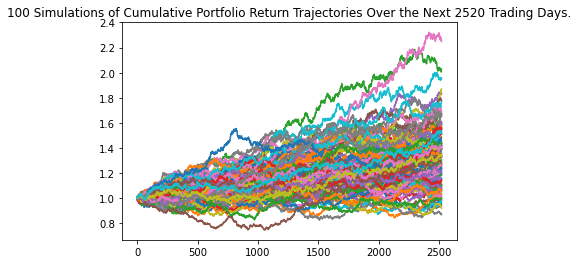

In [15]:
# Plot simulation outcomes
line_plot = MC_ETF.plot_simulation()

In [16]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_ETF.simulated_return.mean(axis=1)),
    "median": list(MC_ETF.simulated_return.median(axis=1)),
    "min": list(MC_ETF.simulated_return.min(axis=1)),
    "max": list(MC_ETF.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000445,1.000601,0.990395,1.008670
2,1.001173,1.001574,0.986733,1.016899
3,1.000540,1.000716,0.977342,1.015944
4,1.000367,1.000598,0.983031,1.018313
...,...,...,...,...
2516,1.347662,1.338726,0.880579,2.265919
2517,1.347257,1.337703,0.876201,2.257808
2518,1.347102,1.339922,0.868421,2.253774
2519,1.346997,1.340438,0.868988,2.257286


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of ETF Portfolio'}>

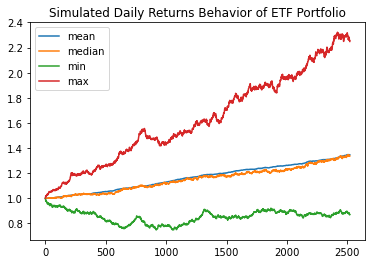

In [17]:
# Use the `plot` function to visually analyze the trajectory of AAPL stock daily returns on a 252 trading day simulation
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of ETF Portfolio")

In [18]:
# Set initial investment
# Use widget to set investment amount


In [19]:
investment=widgets.IntSlider(
    value=10,
    min=1000,
    max=1000000,
    step=1000,
    description='Investment:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

display(investment)

IntSlider(value=1000, continuous_update=False, description='Investment:', max=1000000, min=1000, step=1000)

In [20]:
investment = int(investment.value)
print(investment)

1000


In [21]:
# Set initial investment
initial_investment = investment

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl

,mean,median,min,max
0,1000.000000,1000.000000,1000.000000,1000.000000
1,1000.444911,1000.600599,990.395451,1008.669601
2,1001.172683,1001.574035,986.732754,1016.899113
3,1000.539788,1000.715844,977.342288,1015.944110
4,1000.367369,1000.598252,983.031365,1018.312730
...,...,...,...,...
2516,1347.662354,1338.725550,880.578553,2265.919069
2517,1347.256936,1337.702505,876.200531,2257.808057
2518,1347.101605,1339.922181,868.421143,2253.773689
2519,1346.997010,1340.438060,868.987810,2257.286331


<AxesSubplot:title={'center':'Simulated Outcomes Behavior of ETF Portfolio'}>

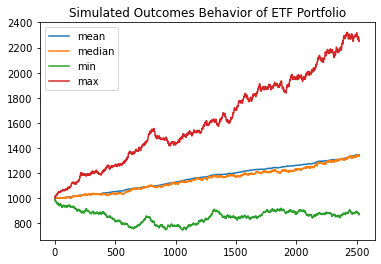

In [22]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title="Simulated Outcomes Behavior of ETF Portfolio")

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_ETF.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           100.000000
mean              1.346491
std               0.261716
min               0.871113
25%               1.132687
50%               1.337380
75%               1.517867
max               2.248494
95% CI Lower      0.943037
95% CI Upper      1.913781
Name: 2520, dtype: float64


In [24]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in ETF portfolio
# Bridge back to Widget for initial investment
ci_lower = tbl[8]* investment
ci_upper = tbl[9]* investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}.")

There is a 95% chance that an initial investment of $1,000.00 in the portfolio over the next year will end within in the range of $943.04 and $1,913.78.


In [25]:
# Creating a DataFrame that holds the closing prices for each ETF and dropping the time component from the index
closing_prices_df= pd.DataFrame()

for ticker in tickers:
    closing_prices_df[ticker]=alpaca_df[ticker]["close"]
    
closing_prices_df.index= closing_prices_df.index.date
closing_prices_df.head()

,AGG
2018-08-23,106.62
2018-08-24,106.72
2018-08-27,106.59
2018-08-28,106.38
2018-08-29,106.36


In [26]:
#Calculating daily returns and removing the rows of data that have missing values
daily_returns= closing_prices_df.pct_change().dropna()
daily_returns.head()

,AGG
2018-08-24,0.000938
2018-08-27,-0.001218
2018-08-28,-0.001970
2018-08-29,-0.000188
2018-08-30,0.000658


In [27]:
#Creates a summary data of daily returns for each ETF
daily_returns.describe()

,AGG
count,752.000000
mean,0.000120
std,0.003578
min,-0.040343
25%,-0.001093
50%,0.000186
75%,0.001424
max,0.027948


In [28]:
# Daynamic visaulisation of daily returns for each ETF
daily_returns.hvplot.box(title= "ETF Daily Returns covering the period of last three years", 
                     ylabel= "Daily Returns", xlabel= "ETF Ticker", size=(30,15)
)

AttributeError: 'DataFrame' object has no attribute 'hvplot'

In [ ]:
# Calculcates The Cumulative Returns on an investment over the period of last 3 years
cumulative_returns= (1+ daily_returns).cumprod()
cumulative_returns.tail(1)

In [ ]:
# Dynamic visualisation of cumulative returns of all ETFS over the period of last 3 years
cumulative_returns.hvplot(title= "Cumulative returns of all ETFS the period of last three years", 
                     ylabel= "Daily Returns", xlabel= "Date")

In [ ]:
# Evaluating the risk profile of each ETFs by calculating the standard deviation and sorting them in an ascending order.
standard_deviation = daily_returns.std()
standard_deviation.sort_values()
display(standard_deviation)
print(
          f"The *least* volatile ETF is {standard_deviation.index[0]} with a Standard Deviation of: {round(standard_deviation[0], 3)}\n"
          f"The *most* volatile ETF is {standard_deviation.index[-1]} with a Standard Deviation of: {round(standard_deviation[-1], 3)}\n"
    )


In [ ]:
# Evaluating the risk profile of each ETFs by calculating the standard deviation and sorting them in an ascending order.
annual_standard_deviation = standard_deviation * np.sqrt(252)
annual_standard_deviation.sort_values()
display(annual_standard_deviation)
print(
          f"When annualised, The *least* volatile ETF is {annual_standard_deviation.index[0]} with a Standard Deviation of: {round(annual_standard_deviation[0], 3)}\n"
          f"When annualised, The *most* volatile ETF is {annual_standard_deviation.index[-1]} with a Standard Deviation of: {round(annual_standard_deviation[-1], 3)}\n"
    )

In [ ]:
# Calculates and plots a 30-day rolling standard deviation for all ETFs
rolling_std = daily_returns.rolling(window = 30).std()
rolling_std.plot(figsize= (20,10), 
                 title = '21-day rolling standard deviation for ETFs ')

In [ ]:

daily_returns.sum(axis=0).divide(252).sort_values()

In [29]:
sharpe_ratio = (daily_returns.sum(axis=0).divide(252).sort_values())/(daily_returns.std(axis=0).sort_values())
sharpe_ratio.head()

AGG    0.100321
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

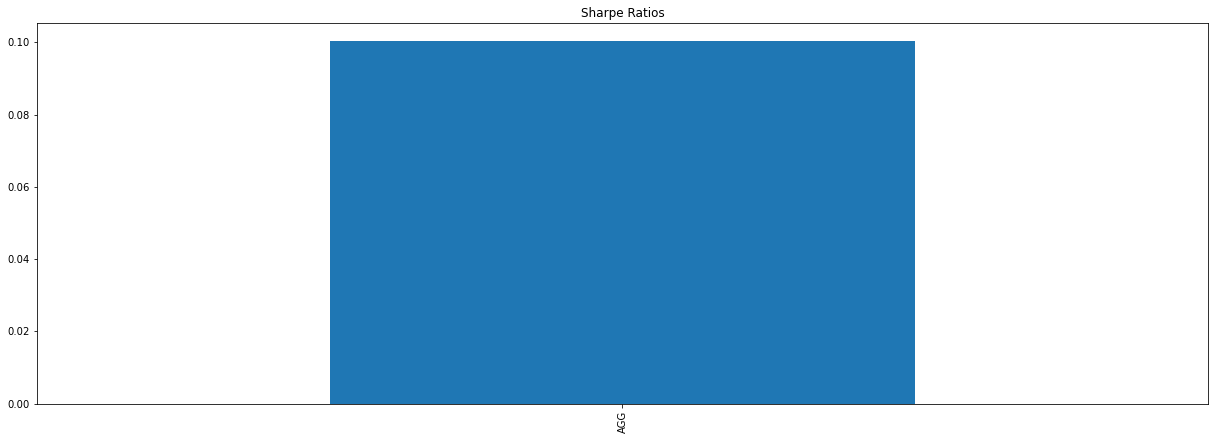

In [30]:

sharpe_ratio.plot(title="Sharpe Ratios", kind="bar", figsize=(21,7))

In [31]:
start_date1 = pd.Timestamp(three_years_ago).isoformat()
end_date1 = pd.Timestamp(today).isoformat()
                       
sp500_df = web.DataReader(['sp500'], 'fred', start_date1, end_date1)
sp500_df

,sp500
DATE,
2018-08-23,2856.98
2018-08-24,2874.69
2018-08-27,2896.74
2018-08-28,2897.52
2018-08-29,2914.04
...,...
2021-08-16,4479.71
2021-08-17,4448.08
2021-08-18,4400.27


In [32]:

daily_sp500_returns_df = sp500_df.pct_change().dropna()
daily_sp500_returns_df.head()

,sp500
DATE,
2018-08-24,0.006199
2018-08-27,0.007670
2018-08-28,0.000269
2018-08-29,0.005701
2018-08-30,-0.004430


In [33]:

daily_sp500_returns_var = daily_sp500_returns_df.rolling(5).var().dropna()
daily_sp500_returns_var.head()

,sp500
DATE,
2018-08-30,0.000025
2018-08-31,0.000023
2018-09-03,0.000013
2018-09-04,0.000014
2018-09-05,0.000004


In [35]:
qqq_cov = daily_returns['QQQ'].rolling(5).cov(daily_sp500_returns_df).dropna()
display(qqq_cov.head())
xle_cov = daily_returns['XLE'].rolling(5).cov(daily_sp500_returns_df).dropna()
display(xle_cov.head())

KeyError: 'QQQ'

In [36]:

qqq_beta = qqq_cov/daily_sp500_returns_var
display(qqq_beta.dropna().head())
xle_beta = xle_cov/daily_sp500_returns_var
display(xle_beta.dropna().head())

NameError: name 'qqq_cov' is not defined

In [37]:
qqq_beta_mean = qqq_beta.rolling(5).mean().dropna()
display(qqq_beta_mean.head())
xle_beta_mean = xle_beta.rolling(5).mean().dropna()
display(xle_beta_mean.head())

NameError: name 'qqq_beta' is not defined

In [38]:
qqq_beta.plot(title="QQQ Beta", figsize=(14, 7))

NameError: name 'qqq_beta' is not defined

In [39]:
xle_beta.plot(title="XLE Beta", figsize=(14, 7))

NameError: name 'xle_beta' is not defined